# CHAPTER 3
CNN and RNN Using PyTorch

In [1]:
import torch
import sklearn
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(1)

N_SAMPLES = 20
N_HIDDEN = 300

## Recipe 3-14. Restricting Model Overfitting Problem
To restrict model overfitting, we consciously introduce dropout rate, which means randomly delete (let’s say) 10% or 20% of the weights in the network, and check the model accuracy at the same time. If we are able to match the same model accuracy after deleting the 10% or 20% of the weights, then our model is good.

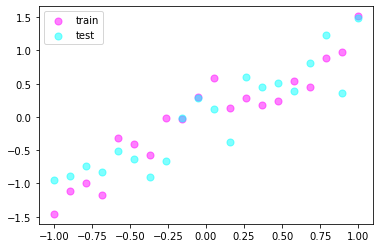

In [2]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3 * torch.normal(
    torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1)
)
x, y = Variable(x), Variable(y)

# testing data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3 * torch.normal(
    torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1)
)
test_x, test_y = Variable(test_x), Variable(test_y)

plt.scatter(x, y, c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x, test_y, c='cyan', s=50, alpha=0.5, label='test')
plt.legend()
plt.show()

In [7]:
net_overfit = nn.Sequential(
    nn.Linear(1, N_HIDDEN),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, N_HIDDEN),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, 1)
)
net_drop = nn.Sequential(
    nn.Linear(1, N_HIDDEN),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, N_HIDDEN),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, 1)
)
print(net_overfit)
print(net_drop)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [8]:
optimizer_overfit = torch.optim.Adam(net_overfit.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_drop.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

## Recipe 3-15. Visualizing the Model OverfitProblem

In [3]:
x = torch.tensor([[1, 1], [1, 0], [0, 1], [0, 0]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        
        self.net = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
        
    def forward(self, x):
        out = self.net(x)
        return out
        
xor = XOR()
print(xor)
optimizer = torch.optim.Adam(xor.parameters(), lr=0.05)
loss_fn = nn.MSELoss()

for epoch in range(100):
    y_pred = xor(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
y_pred = xor(x)
print(y_pred)

XOR(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)
tensor([[-0.0024],
        [ 0.4993],
        [ 1.0002],
        [ 0.4993]], grad_fn=<AddmmBackward>)
